# Function Tests

Test normalizing, augmentation, and other preprocessing functions used in the Transformer

In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import ast
import numpy as np

base_path = 'wlasl'

## Body Normalization Function & Visualization

In [2]:
from normalization.body_normalization import BODY_IDENTIFIERS

train_df = pd.read_csv(f'{base_path}/train.csv')
row_dict = train_df.iloc[1400, :-1].to_dict()

for key, value in row_dict.items():
  row_dict[key] = ast.literal_eval(value)

body_dict = {key: value for key, value in row_dict.items() if any(substring in key for substring in BODY_IDENTIFIERS)}


In [3]:
print(len(body_dict))
print(body_dict.keys())

print(body_dict['shoulderL_X'])

26
dict_keys(['nose_X', 'nose_Y', 'eye_innerL_X', 'eye_innerL_Y', 'eye_innerR_X', 'eye_innerR_Y', 'eye_outerL_X', 'eye_outerL_Y', 'eye_outerR_X', 'eye_outerR_Y', 'mouthL_X', 'mouthL_Y', 'mouthR_X', 'mouthR_Y', 'shoulderL_X', 'shoulderL_Y', 'shoulderR_X', 'shoulderR_Y', 'wrist_poseL_X', 'wrist_poseL_Y', 'wrist_poseR_X', 'wrist_poseR_Y', 'elbowL_X', 'elbowL_Y', 'elbowR_X', 'elbowR_Y'])
[0.6836255192756653, 0.6834246516227722, 0.6829156875610352, 0.6826279163360596, 0.682300329208374, 0.6818525195121765, 0.6810883283615112, 0.6809150576591492, 0.6802366971969604, 0.6795056462287903, 0.6790845990180969, 0.677973747253418, 0.676912248134613, 0.6768803000450134, 0.6758593916893005, 0.6740593910217285, 0.6726610660552979, 0.672031044960022, 0.6712268590927124, 0.6711260676383972, 0.6708153486251831, 0.6707502007484436, 0.6707831621170044, 0.6708224415779114, 0.6707749366760254, 0.670778214931488, 0.6707682609558105, 0.6707518696784973, 0.6707586646080017, 0.6707702279090881, 0.670789182186126

In [4]:
from collections import defaultdict

feature_dict = defaultdict(list)
# Iterate over keys and values in the dictionary
for key, value in body_dict.items():
    
    # Extract the feature name (e.g., eye_innerL, eye_innerR, etc.)
    feature_name = key[:-2]  # Split by underscore and take the first part
    # Append the value to the corresponding feature list
    feature_dict[feature_name].append(value)

for feature, values in feature_dict.items():
    feature_dict[feature] = np.array(values).T.tolist()
    
np.shape(feature_dict['eye_innerR'])

#print(feature_dict['nose'][0][0])

(52, 2)

In [5]:
from normalization.body_normalization import normalize_single_dict

norm_ft_dict, start_pt, end_pt, head_metric = normalize_single_dict(feature_dict)

distances: 0.6836255192756653 -0.3369164764881134) ** 2) + ((0.45204752683639526 - 0.4524790942668915) ** 2)) ** 0.5 )
distances: 0.6834246516227722 -0.3357711434364319) ** 2) + ((0.4503084123134613 - 0.4524784982204437) ** 2)) ** 0.5 )
distances: 0.6829156875610352 -0.3348325788974762) ** 2) + ((0.44889169931411743 - 0.45248833298683167) ** 2)) ** 0.5 )
distances: 0.6826279163360596 -0.33403894305229187) ** 2) + ((0.4483281373977661 - 0.4523489475250244) ** 2)) ** 0.5 )
distances: 0.682300329208374 -0.33347177505493164) ** 2) + ((0.44734740257263184 - 0.4520120620727539) ** 2)) ** 0.5 )
distances: 0.6818525195121765 -0.33269202709198) ** 2) + ((0.4468873143196106 - 0.45174121856689453) ** 2)) ** 0.5 )
distances: 0.6810883283615112 -0.3320564329624176) ** 2) + ((0.44682854413986206 - 0.45154839754104614) ** 2)) ** 0.5 )
distances: 0.6809150576591492 -0.332058846950531) ** 2) + ((0.44580045342445374 - 0.4501502513885498) ** 2)) ** 0.5 )
distances: 0.6802366971969604 -0.3320118486881256)

In [6]:
import json

with open(f'{base_path}/WLASL100_parsed_data.json', 'r') as json_file:
    data = json.load(json_file)

data_train = [data[i] for i in range(len(data)) if data[i]['split'] == 'train']
vid_inst = data_train[1400]
vid_inst



{'gloss': 'same',
 'label': 96,
 'bbox': [319, 70, 894, 720],
 'video_id': '49186',
 'video_path': 'wlasl/videos100/49186.mp4',
 'frame_start': 1,
 'frame_end': -1,
 'split': 'train'}

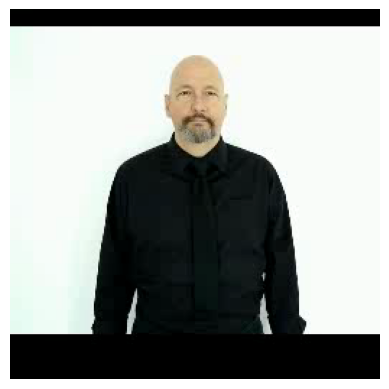

In [7]:
vid_id = vid_inst['video_id']
video_path = f'wlasl/videos100/{vid_id}.mp4'
cap = cv2.VideoCapture(video_path)

ret, frame = cap.read()

frame.flags.writeable = False
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame)
plt.axis('off')
plt.show()

cap.release()

256 256
[0.6836255192756653, 0.45204752683639526]
[0.3369164764881134, 0.4524790942668915]
(175, 115)


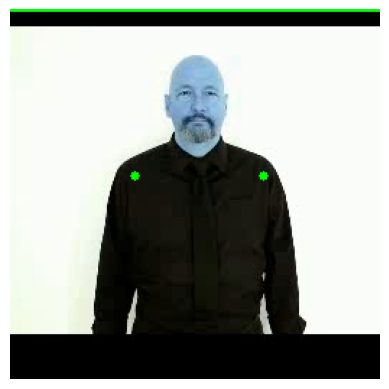

In [8]:
height, width, _ = frame.shape
print(height,width)

# Draw the bounding box rectangle
(x1,y1) = (int(start_pt[0]*width), int(start_pt[1]*height))
(x2,y2) = (int(end_pt[0]*width),int(end_pt[1]*height))
cv2.rectangle(frame, (x1,y1), (x2,y2), (0, 255, 0), 2)

print(feature_dict['shoulderL'][0])
print(feature_dict['shoulderR'][0])

left_shoulderog = (int(body_dict['shoulderL_X'][0]*width), int(body_dict['shoulderL_Y'][0]*height))
right_shoulderog = (int(body_dict['shoulderR_X'][0]*width), int(body_dict['shoulderR_Y'][0]*height))

cv2.circle(frame, left_shoulderog, 3, (0, 0, 255), -1)
cv2.circle(frame, right_shoulderog, 3, (0, 0, 255), -1)

left_shoulder = (int(feature_dict['shoulderL'][0][0]*width), int(feature_dict['shoulderL'][0][1]*height))
right_shoulder = (int(feature_dict['shoulderR'][0][0]*width), int(feature_dict['shoulderR'][0][1]*height))

print(left_shoulder)

cv2.circle(frame, left_shoulder, 3, (0, 255, 0), -1)
cv2.circle(frame, right_shoulder, 3, (0, 255, 0), -1)

plt.imshow(frame[:,:,::-1])
plt.axis('off')
plt.show()

In [9]:
head_metric*width

88.78692436821598